In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

##### 因為是灰階的圖片，所以只有一個channel (RPG才有3個channel)
所以(28,28) --> (28,28,1)

In [7]:
x_train = x_train.reshape(60000,28,28,1) /255

In [8]:
x_test = x_test.reshape(10000,28,28,1) / 255

In [9]:
x_train[87].shape

(28, 28, 1)

In [10]:
y_train[87]

9

In [11]:
from tensorflow.keras.utils import to_categorical 

##### y_train[87] = 9
改成以[0,0,0,0,0,0,0,0,1]呈現

In [12]:
y_train  = to_categorical(y_train,10)
y_test = to_categorical (y_test,10)

#### 讀入必要的函示

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### Step 1 打造函數學習機（CNN）

In [14]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), padding = "same", input_shape = (28,28,1), activation ="relu"))

##### - 輸出 16 個28*28 矩陣
##### - 事實上是（28,28,16), 每個filter都是一個channel, 所以總共有16個

In [17]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [18]:
# 變成（14,14,16）28/2 = 14, 因為MaxPooling是（2*2）

In [20]:
model.add(Conv2D(32,(3,3), padding = "same", activation = "relu"))

In [21]:
# output(14,14,32)

In [22]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [23]:
# output(7,7,32)

In [24]:
model.add(Conv2D(64,(3,3), padding = "same", activation = "relu"))

In [25]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [26]:
# output(7,7,64)

In [27]:
model.add(Flatten())

In [29]:
model.add(Dense(54, activation = "relu"))

In [31]:
# dense = 10, 輸出要是10個數字
# softmax是把數值變成0-1
model.add(Dense(10, activation="softmax"))

### 看一下我們的神經網路

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [33]:
# filter (3*3), bias = 1
(3*3+1)*16

160

In [34]:
model.compile(loss = "mse", optimizer = SGD(lr = 0.087), metrics = ["accuracy"])

### Step 2. fit

In [35]:
model.fit(x_train, y_train, batch_size = 128, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 32s 536us/sample - loss: 0.0901 - accuracy: 0.0975
Epoch 2/12
60000/60000 [==============================] - 29s 479us/sample - loss: 0.0901 - accuracy: 0.0975
Epoch 3/12
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0900 - accuracy: 0.0975
Epoch 4/12
60000/60000 [==============================] - 33s 547us/sample - loss: 0.0900 - accuracy: 0.0975
Epoch 5/12
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0900 - accuracy: 0.0975
Epoch 6/12
60000/60000 [==============================] - 30s 503us/sample - loss: 0.0900 - accuracy: 0.0975
Epoch 7/12
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0900 - accuracy: 0.1025
Epoch 8/12
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0900 - accuracy: 0.1145
Epoch 9/12
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0900 - accuracy: 0.1

### Step 3 預測

In [46]:
result = model.predict_classes(x_test)

In [47]:
def my_predict(n):
    print("我可愛的 CNN 預測是", result[n])
    x = x_test[n].reshape(28,28)
    plt.imshow(x, cmap = "cool")

我可愛的 CNN 預測是 1


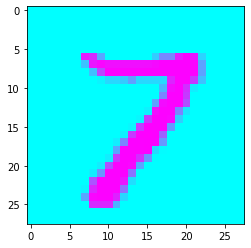

In [49]:
my_predict(34)

In [51]:
from ipywidgets import interact_manual

In [52]:
interact_manual(my_predict, n = (0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>